In [1]:
import os
import IPython
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
from scipy.signal import spectrogram, find_peaks
import torch
import torch.nn as nn
import torchaudio
from torchaudio import transforms
import torch.nn.functional as F
from torch.nn import init
from torch.utils.data import random_split
import torchvision.models as models

/opt/anaconda3/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(


In [2]:
path = "/Users/weiqiangqian/541_project/Audio_Files"
data = []
classid = []
max_len = 101429
n_mels=64
n_fft=1024
hop_len=None
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        foldername = os.path.basename(dirname)
        full_path = os.path.join(dirname, filename)
        if(dirname == '/Users/weiqiangqian/541_project/Audio_Files/Major'):
            classid.append(1)
        if(dirname == '/Users/weiqiangqian/541_project/Audio_Files/Minor'):
            classid.append(0)
        signal,fs = torchaudio.load(full_path)
        num_rows, sig_len = signal.shape
        if(sig_len < max_len):
            pad_begin_len = random.randint(0, max_len - sig_len)
            pad_end_len = max_len - sig_len - pad_begin_len
              # Pad with 0s
            pad_begin = torch.zeros((num_rows, pad_begin_len))
            pad_end = torch.zeros((num_rows, pad_end_len))

            signal = torch.cat((pad_begin, signal, pad_end), 1)
            
#             signal,fs = aud
#             _, sig_len = signal.shape
#             shift_amt = int(random.random() * shift_limit * sig_len)
            
#         print(sig_len)
#         fs, signal = wavfile.read(full_path)
#         N = len(signal)
#         time = np.linspace(0., N/fs, N)
#         f, t, Sxx = spectrogram(signal, fs, nperseg=10000, nfft = 50000)
            spec = transforms.MelSpectrogram(fs, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(signal)
            spec = transforms.AmplitudeToDB(top_db=80)(spec)
#         print(np.array(Sxx).shape)
        data.append(spec)
#         print(signal.shape)
    

/opt/anaconda3/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1607370249289/work/aten/src/ATen/native/SpectralOps.cpp:653.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore
/opt/anaconda3/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1607370249289/work/aten/src/ATen/native/SpectralOps.cpp:590.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # t

In [3]:
# list(newtrain_ds)[0]

In [4]:
len(classid)

859

In [5]:
# x = zip(data,classid)
# x = list(x)
x = list(zip(data, classid))

In [6]:
num_items = len(x)
num_train = round(num_items * 0.85)
num_test = num_items - num_train
train_ds, test_ds = random_split(x, [num_train, num_test])
num_val = num_test
num_newtrain = num_train - num_val
newtrain_ds,val_ds = random_split(train_ds,[num_newtrain,num_val])
train_dl = torch.utils.data.DataLoader(newtrain_ds, batch_size=16, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=16, shuffle=True)
test_dl = torch.utils.data.DataLoader(test_ds,batch_size=16,shuffle=True)

In [7]:
# for i in range(len(newtrain_ds)):
#     if newtrain_ds[i][0].shape[2] == 11:
#         break

In [8]:
list(train_dl)[0][0].shape

torch.Size([16, 1, 64, 199])

In [9]:
len(newtrain_ds)

601

In [10]:
[i[0].shape for i in list(newtrain_ds)[:100]]

[torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 torch.Size([1, 64, 199]),
 

In [11]:
class AudioClassifier (nn.Module):
    # ----------------------------
    # Build the model architecture
    # ----------------------------
    def __init__(self):
        super().__init__()
        conv_layers = []

        # First Convolution Block with Relu and Batch Norm. Use Kaiming Initialization
        self.conv1 = nn.Conv2d(1, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(16)
        init.kaiming_normal_(self.conv1.weight, a=0.1)
        self.conv1.bias.data.zero_()
        conv_layers += [self.conv1, self.relu1, self.bn1]

        # Second Convolution Block
        self.conv2 = nn.Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm2d(16)
        init.kaiming_normal_(self.conv2.weight, a=0.1)
        self.conv2.bias.data.zero_()
        conv_layers += [self.conv2, self.relu2, self.bn2]

        # Second Convolution Block
        self.conv3 = nn.Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu3 = nn.ReLU()
        self.bn3 = nn.BatchNorm2d(32)
        init.kaiming_normal_(self.conv3.weight, a=0.1)
        self.conv3.bias.data.zero_()
        conv_layers += [self.conv3, self.relu3, self.bn3]

        # Second Convolution Block
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu4 = nn.ReLU()
        self.bn4 = nn.BatchNorm2d(64)
        init.kaiming_normal_(self.conv4.weight, a=0.1)
        self.conv4.bias.data.zero_()
        conv_layers += [self.conv4, self.relu4, self.bn4]

        # Linear Classifier
        self.ap = nn.AdaptiveAvgPool2d(output_size=1)
        self.lin = nn.Linear(in_features=64, out_features=10)

        # Wrap the Convolutional Blocks
        self.conv = nn.Sequential(*conv_layers)
 
    # ----------------------------
    # Forward pass computations
    # ----------------------------
    def forward(self, x):
        # Run the convolutional blocks
        x = self.conv(x)

        # Adaptive pool and flatten for input to linear layer
        x = self.ap(x)
        x = x.view(x.shape[0], -1)

        # Linear layer
        x = self.lin(x)

        # Final output
        return x

# Create the model and put it on the GPU if available
myModel = AudioClassifier()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
myModel = myModel.to(device)
# Check that it is on Cuda
next(myModel.parameters()).device

device(type='cpu')

In [12]:
def training(model, train_dl, num_epochs):
  # Loss Function, Optimizer an  # Loss Function, Optimizer and Scheduler
#d Scheduler
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
  scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001,
                                                steps_per_epoch=int(len(train_dl)),
                                                epochs=num_epochs,
                                                anneal_strategy='linear')
  acc_train = [] 
  val_acc = []
  loss_list = []
  # Repeat for each epoch
  for epoch in range(num_epochs):
    running_loss = 0.0
    correct_prediction = 0
    total_prediction = 0

    # Repeat for each batch in the training set
    for i, data in enumerate(train_dl):
        # Get the input features and target labels, and put them on the GPU
        inputs, labels = data[0].to(device), data[1].to(device)
        # Normalize the inputs


        inputs_m, inputs_s = inputs.mean(), inputs.std()
        inputs = (inputs - inputs_m) / inputs_s


        # Zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

        # Keep stats for Loss and Accuracy
        running_loss += loss.item()

        # Get the predicted class with the highest score
        _, prediction = torch.max(outputs,1)
        # Count of predictions that matched the target label
        correct_prediction += (prediction == labels).sum().item()
        total_prediction += prediction.shape[0]

        #if i % 10 == 0:    # print every 10 mini-batches
        #    print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 10))
    
    # Print stats at the end of the epoch
    num_batches = len(train_dl)
    avg_loss = running_loss / num_batches
    train_acc = correct_prediction/total_prediction
    acc_train.append(train_acc)
#     print(acc_train)
    print(f'Epoch: {epoch}, Loss: {avg_loss:.2f}, Accuracy: {train_acc:.2f}')
    acc_v = inference(myModel, val_dl)
    val_acc.append(acc_v)
    loss_list.append(avg_loss)
  print('Finished Training')
  return acc_train, val_acc, loss_list
num_epochs=20   # Just for demo, adjust this higher.

In [13]:
# training(myModel, test_dl, num_epochs)

In [14]:
def inference (model, val_dl):
  correct_prediction = 0
  total_prediction = 0
  # Disable gradient updates
  with torch.no_grad():
    for data in val_dl:
      # Get the input features and target labels, and put them on the GPU
      inputs, labels = data[0].to(device), data[1].to(device)

      # Normalize the inputs
      inputs_m, inputs_s = inputs.mean(), inputs.std()
      inputs = (inputs - inputs_m) / inputs_s

      # Get predictions
      outputs = model(inputs)

      # Get the predicted class with the highest score
      _, prediction = torch.max(outputs,1)
      # Count of predictions that matched the target label
      correct_prediction += (prediction == labels).sum().item()
      total_prediction += prediction.shape[0]
    
  acc = correct_prediction/total_prediction
  print(f'Accuracy: {acc:.2f}, Total items: {total_prediction}')
  return acc
# Run inference on trained model with the validation set
inference(myModel, val_dl)

Accuracy: 0.11, Total items: 129


[W NNPACK.cpp:80] Could not initialize NNPACK! Reason: Unsupported hardware.


0.10852713178294573

In [15]:
a,b,c = training(myModel, train_dl, num_epochs)

Epoch: 0, Loss: 2.27, Accuracy: 0.13
Accuracy: 0.21, Total items: 129
Epoch: 1, Loss: 2.23, Accuracy: 0.34
Accuracy: 0.37, Total items: 129
Epoch: 2, Loss: 2.14, Accuracy: 0.53
Accuracy: 0.53, Total items: 129
Epoch: 3, Loss: 1.91, Accuracy: 0.61
Accuracy: 0.50, Total items: 129
Epoch: 4, Loss: 1.45, Accuracy: 0.63
Accuracy: 0.60, Total items: 129
Epoch: 5, Loss: 0.96, Accuracy: 0.65
Accuracy: 0.57, Total items: 129
Epoch: 6, Loss: 0.72, Accuracy: 0.70
Accuracy: 0.57, Total items: 129
Epoch: 7, Loss: 0.63, Accuracy: 0.71
Accuracy: 0.63, Total items: 129
Epoch: 8, Loss: 0.58, Accuracy: 0.73
Accuracy: 0.64, Total items: 129
Epoch: 9, Loss: 0.53, Accuracy: 0.77
Accuracy: 0.66, Total items: 129
Epoch: 10, Loss: 0.48, Accuracy: 0.80
Accuracy: 0.61, Total items: 129
Epoch: 11, Loss: 0.45, Accuracy: 0.81
Accuracy: 0.65, Total items: 129
Epoch: 12, Loss: 0.40, Accuracy: 0.85
Accuracy: 0.65, Total items: 129
Epoch: 13, Loss: 0.37, Accuracy: 0.87
Accuracy: 0.66, Total items: 129
Epoch: 14, Loss:

In [16]:
type(c)

list

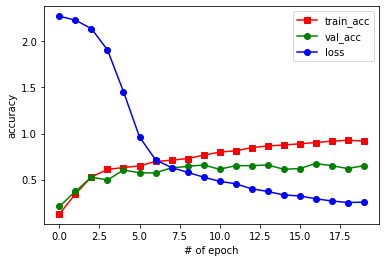

In [17]:
n = np.arange(0,20,1)
plt.plot(n,a,'s-',color = 'r',label="train_acc")#s-:方形
plt.plot(n,b,'o-',color = 'g',label="val_acc")#o-:圆形
plt.plot(n,c,'o-',color = 'b',label="loss")
plt.xlabel("# of epoch")#横坐标名字
plt.ylabel("accuracy")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()

In [22]:
inference(myModel, test_dl)

Accuracy: 0.67, Total items: 129


0.6666666666666666